In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lib_new.io_lib import *
from lib_new.average_waveforms import *
from lib_new.ped_lib import *

----------
Doing:  substract_Pedestal  on channel: 0
----------
Doing:  Average_waveform  on channel: 0
----------
Doing:  Average_waveform  on channel: 0


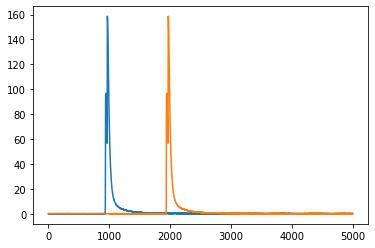

In [30]:
path ="/media/rodrigoa/2Gb/data/SBND_XA_PDE/SBND_XA_VIS/joython/"

for run in range(1):
    if run==3:continue # Rodrigo forgot one run :D
    Run_props=open_run_properties(run,"new_macros/Runs_list.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    
    
    # One channel at a time: 
    # loading all ch waveforms might demmand too much memory, 
    # remember to always delete between runs to prevent overloading)

    # for ch in Run_props["Channels"]:
    for ch in [0]:

        ADC=open_run_var(run_path,"RawADC",[ch],compressed=compress)
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        ADC=do_run_things((ADC,Pedestal_vars,Run_props["Polarity"]),substract_Pedestal)

        Avg_wvf=do_run_things(ADC,Average_waveform)
        # # Average_waveform
        # del Pedestal_vars, ADC
        plt.plot(Avg_wvf[0])
        Avg_wvf=do_run_things((ADC,{0:"shifted"},{0:np.array(np.zeros(len(ADC[ch]))+1000)}),Average_waveform)
        plt.plot(Avg_wvf[0])

array([9, 5, 3, ..., 4, 7, 4])